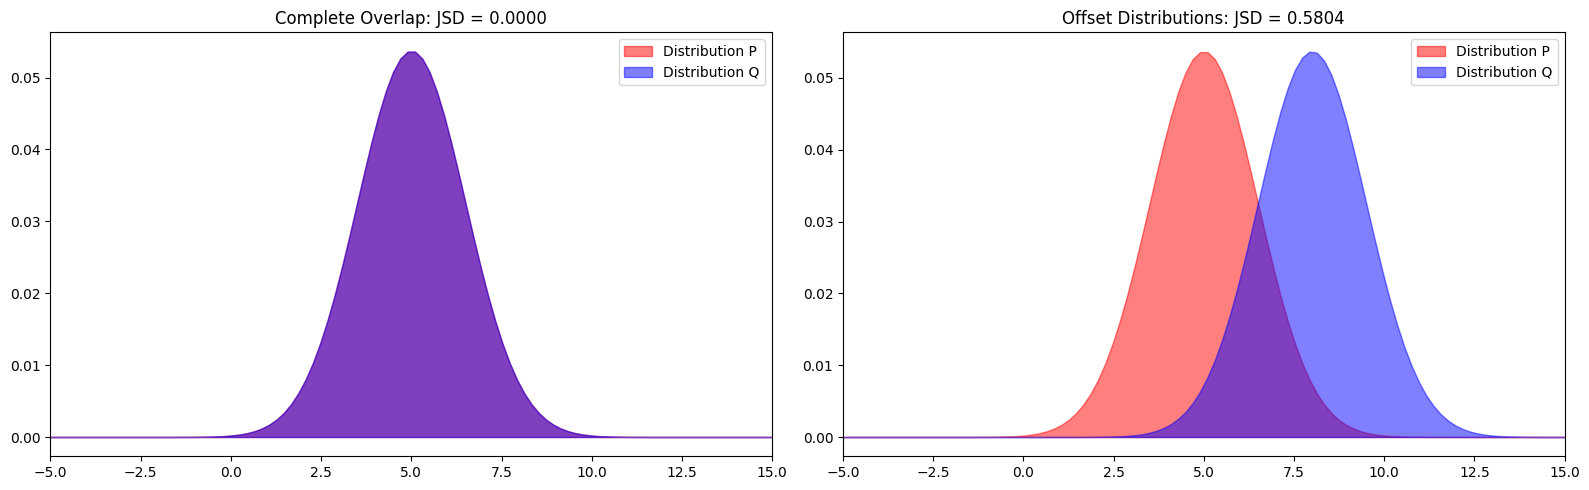

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.stats import norm

# Function to calculate the JSD
def jsd(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    m = 0.5 * (p + q)
    return distance.jensenshannon(p, q)

# Define the x-axis range
x = np.linspace(-5, 15, 100)

# Create two Gaussian distributions with the same shape but different means
mean1, mean2 = 5, 8  # Different means
std_dev = 1.5        # Same standard deviation

p1 = norm.pdf(x, mean1, std_dev)
q1 = norm.pdf(x, mean1, std_dev)  # Completely overlapping distribution

p2 = norm.pdf(x, mean1, std_dev)
q2 = norm.pdf(x, mean2, std_dev)  # Offset distribution

# Normalize distributions so they sum to 1
p1 /= p1.sum()
q1 /= q1.sum()
p2 /= p2.sum()
q2 /= q2.sum()

# Calculate JSDs
jsd_overlap = jsd(p1, q1)
jsd_no_overlap = jsd(p2, q2)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot the first set (complete overlap) with filled curves
axs[0].fill_between(x, p1, color='red', alpha=0.5, label='Distribution P')
axs[0].fill_between(x, q1, color='blue', alpha=0.5, label='Distribution Q')
axs[0].set_title(f'Complete Overlap: JSD = {jsd_overlap:.4f}')
axs[0].set_xlim(-5, 15)
axs[0].legend()

# Plot the second set (offset distributions) with filled curves
axs[1].fill_between(x, p2, color='red', alpha=0.5, label='Distribution P')
axs[1].fill_between(x, q2, color='blue', alpha=0.5, label='Distribution Q')
axs[1].set_title(f'Offset Distributions: JSD = {jsd_no_overlap:.4f}')
axs[1].set_xlim(-5, 15)
axs[1].legend()

# Show plot
plt.tight_layout()
plt.show()